# Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [3]:
pd.set_option("display.max_columns",1000)

## **Step 1: Loading the Dataset**

In [4]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## **Step 2: Understanding the Dataset**

In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Basis the above dataset info we observe the following things needs to be done:
- Encoding categorical variables 
- Missing value handling
- Convert the Select into the NaN
- Dropping columns having more than 70% null values

## **Step 3: Data Preperation Cleaning**

- ### Converting Yes/No to 1/0's:

In [9]:
for col in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:
    df[col] = df[col].apply(lambda x: 1 if x=="Yes" else 0)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


- ### Converting the SELECT's into NaNs

In [10]:
df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [11]:
for col in df.iloc[:,1:].select_dtypes(include="object").columns:
    print(col)
    print("-"*50)
    print(df[col].value_counts(normalize=True))
    print("_"*50)

Lead Origin
--------------------------------------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
__________________________________________________
Lead Source
--------------------------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM   

In [12]:
df = df.replace('Select',np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


- ### Handling the Missing Values

In [15]:
round(df.isnull().sum().sort_values(ascending=False)/df.shape[0],2)

How did you hear about X Education               0.78
Lead Profile                                     0.74
Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Activity Index                      0.46
Asymmetrique Profile Index                       0.46
City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
Page Views Per Visit                             0.01
TotalVisits                                      0.01
Last Activity                                    0.01
Lead Source                                      0.00
Receive More Updates About Our Courses           0.00
I agree to pay the amount th

- Dropping the columns with more than 70% null values

In [16]:
df = df.drop(df.loc[:,list(round(df.isnull().sum()/df.shape[0],2)>0.70)].columns,1)

- Since the Lead Quality depends upon the employee, it will be safer to update the NaN to "Not Sure"

In [17]:
df["Lead Quality"] = df["Lead Quality"].replace(np.nan,"Not Sure")

- There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data.

In [18]:
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Handling the missing values for the below columns:

- City
- Spcialization
- Tags
- What matters most to you in choosing a course
- What is your current occupation
- Countsy

In [20]:
# For City column, we can impute MUMBAI into all the null values, as most Mumbai has the highest weightage.

df["City"] = df["City"].replace(np.nan, "Mumbai")

# There is no significant difference among top 3 specialization , hence it will be safer to impute NaN with Other_Specialization
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

# For What matters most to you in choosing a course column, more than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# For What is your current occupation column, more than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

# For Country column, more than 95% data is of "India" and hence it is safer to impute NULLS with this value
df['Country'] = df['Country'].replace(np.nan, 'India')

In [21]:
round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Tags                                             0.00
Lead Quality                                     0.00
Update me on Supply Chain Content                0.00
X Education Forums                               0.00
Get updates on DM Content                        0.00
City                                             0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
Newspaper                                        0.00
Search                                           0.00
Newspaper Article           

- Basis the above null values review we find that the remaining of the null values are less than 2% and hence these rows can directly be dropped.

In [22]:
df.dropna(inplace=True)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [23]:
df.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Magazine                                         0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Lead Quality                                     0
Tags                                             0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Search                                           0
Lead Number                                      0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                 

## **Step 4: Performing EDA**

- Starting with the Target variable to find any Data imbalance

In [24]:
df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

- Basis the above values, we can find tha the data have good representation of both the classes.

### Hence, moving ahead with the analysis.

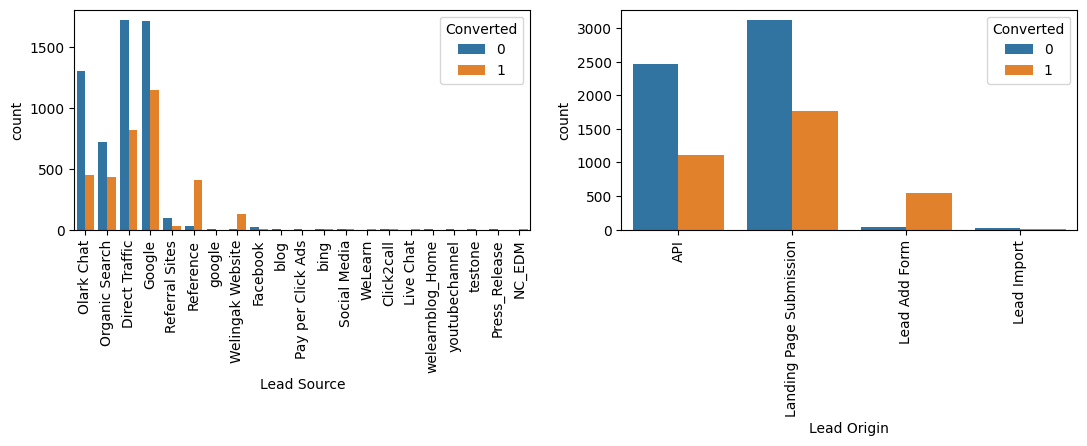

In [25]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(["Lead Source","Lead Origin"]):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=2)
    sns.countplot(x=df[feature],hue=df["Converted"])
    plt.xticks(rotation=90)
    

**OBSERVATIONS:**
- API and Landing Page Submission has less conversion rate, however lead counts for them are high.
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high.
- Lead Import has very less count as well as conversion rate and hence can be ignored


### Now to improve the overall lead conversion rate, we need to focus on the following things:
 - Increasing the conversion rate of 'API' and 'Landing Page Submission'.
 - Increasing the number of leads from 'Lead Add Form'

In [26]:
df["Lead Source"].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [27]:
# As we can clearly observe from the above data the count of leads from various sources are small due to which we can club them into "Others" source for better visualisation and analysis

df["Lead Source"] = df["Lead Source"].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

# And clubbing "Google" and "google" together.
df["Lead Source"] = df["Lead Source"].replace("google","Google")

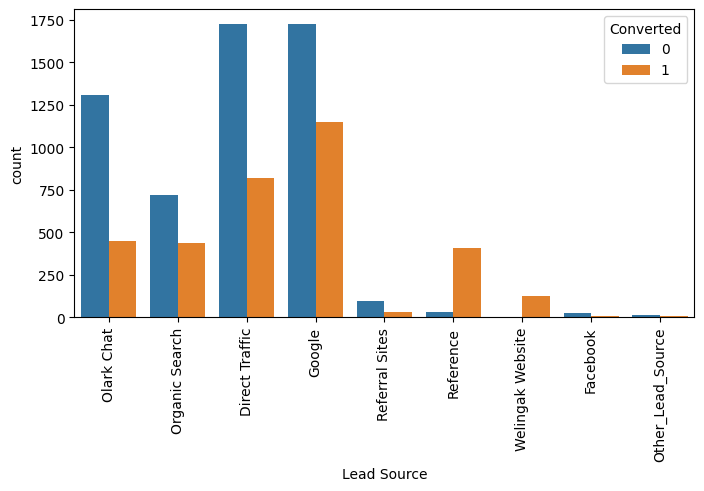

In [28]:
plt.figure(figsize=(8,4))

sns.countplot(x=df["Lead Source"],hue=df["Converted"])
plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS:**

- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

### Now, to improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

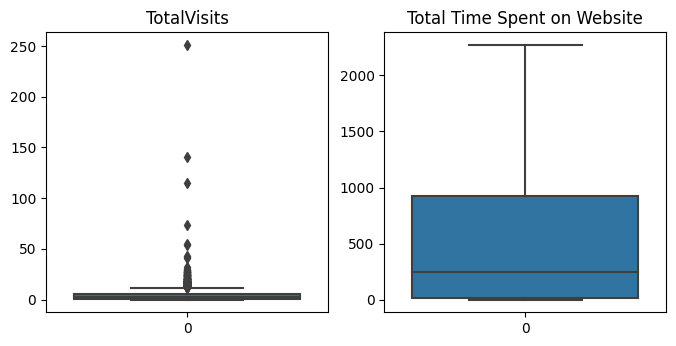

In [29]:
plt.figure(figsize=(8,8))

for i, col in enumerate(["TotalVisits","Total Time Spent on Website"]):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(df[col])
    plt.title(label=col)


- There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

In [30]:
quant1 = df["TotalVisits"].quantile(0.95)
df["TotalVisits"][df["TotalVisits"]>=quant1] = quant1

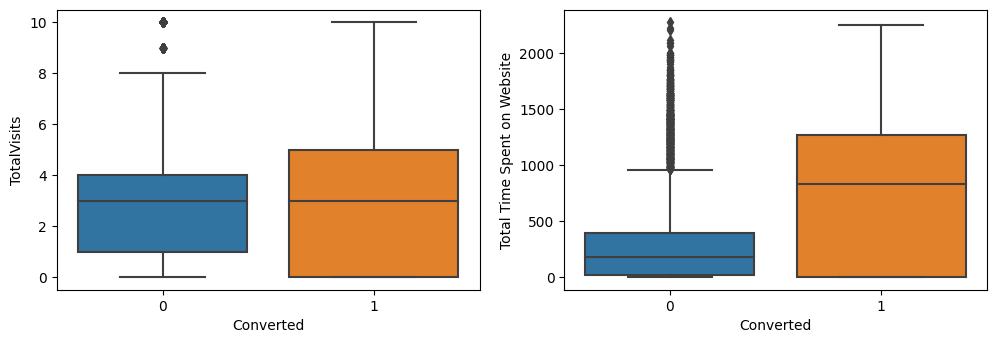

In [31]:
plt.figure(figsize=(12,8))

for i,col in enumerate(["TotalVisits","Total Time Spent on Website"]):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(y= df[col],x= df["Converted"])



**OBSERVATIONS:**

- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

- Users spending more time on the website are more likely to get converted

### Websites can be made more appealing so as to increase the time of the Users on websites

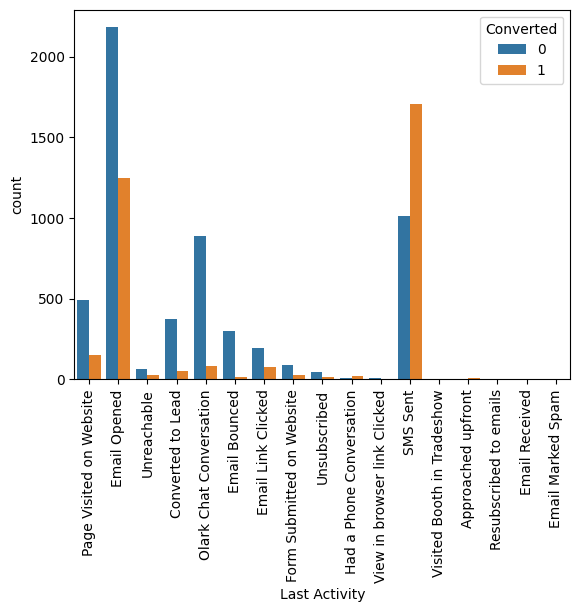

In [32]:
# Plotting the Last Activity

sns.countplot(x=df["Last Activity"],hue=df["Converted"])
plt.xticks(rotation=90)
plt.show()

Basis the above plotted graph, we can observe that there are multiple categories with little to none values. Let's concatenate all the low count categories to **"Others"** ccategory.

In [33]:
df["Last Activity"] = df["Last Activity"].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

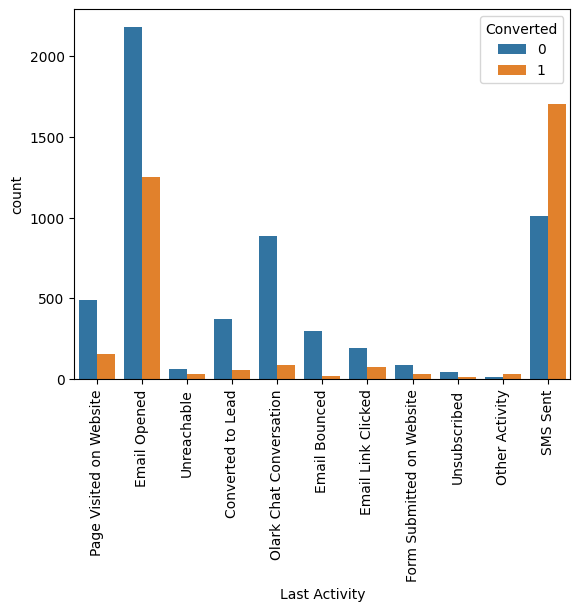

In [34]:
#Plotting the "Last Activity" again

sns.countplot(x=df["Last Activity"],hue=df["Converted"])
plt.xticks(rotation = 90)
plt.show()

**OBSERVATIONS:**

- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

### Let's focus on increasing the conversion rate of those having last activity as "Email Opened" and also try to focus on the ones having last activity as "SMS sent"

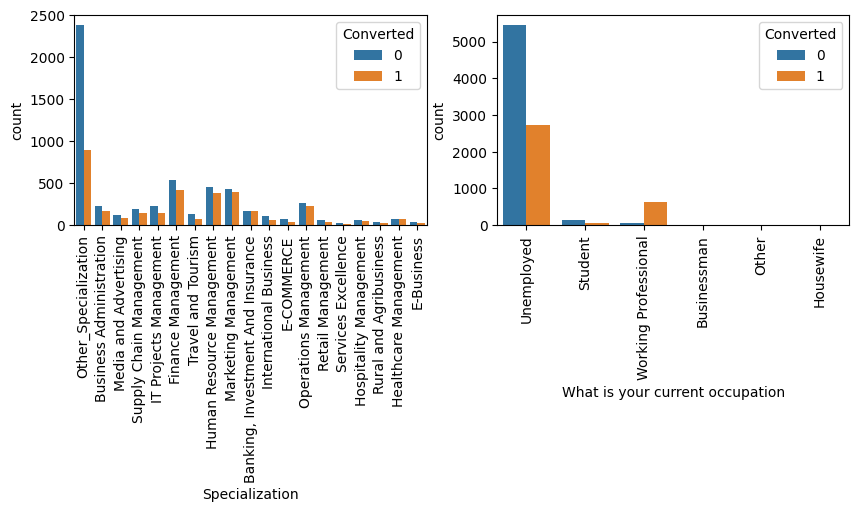

In [35]:
plt.figure(figsize=(10,6))

for i, col in enumerate (["Specialization","What is your current occupation"]):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=0.2)
    sns.countplot(x=df[col],hue=df["Converted"])
    plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS:**

- Basis the above plot, no particular inference can be made for Specialization category.
- Basis the above plot, we observe that working professionals have high conversion rate.
- Also, the number of Unemployed leads are more than any other category.

### Basis the above graph, to increase the overall conversion rate, we should increase the number of Working Professional leads by reaching out to them through different channels. Also, focus on increasing the conversion rate of the Unemployed leads

- "Country", "What matters most to you in choosing a course", and "City" columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns.

In [36]:
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.191867,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,2.780618,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


**OBSERVATIONS:**

- Basis the above data, it can be clearly observed that most values in the all the columns are 0 as "No". Therefore, no inference can be made using these columns.

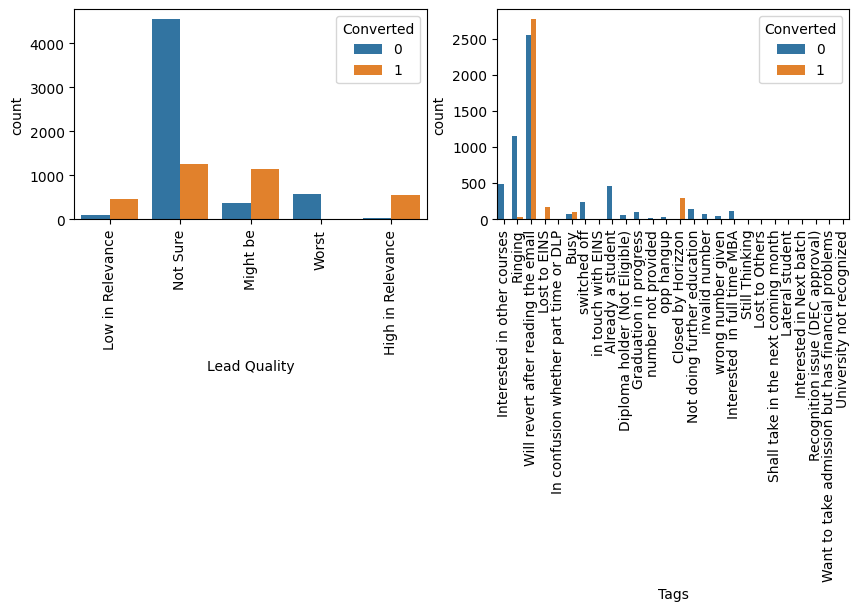

In [37]:
plt.figure(figsize=(10,6))

for i,col in enumerate(["Lead Quality","Tags"]):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=0.2)
    sns.countplot(x=df[col],hue=df["Converted"])
    plt.xticks(rotation=90)
    
plt.show()

In [38]:
# Now converting all the low count categories to Others Category

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

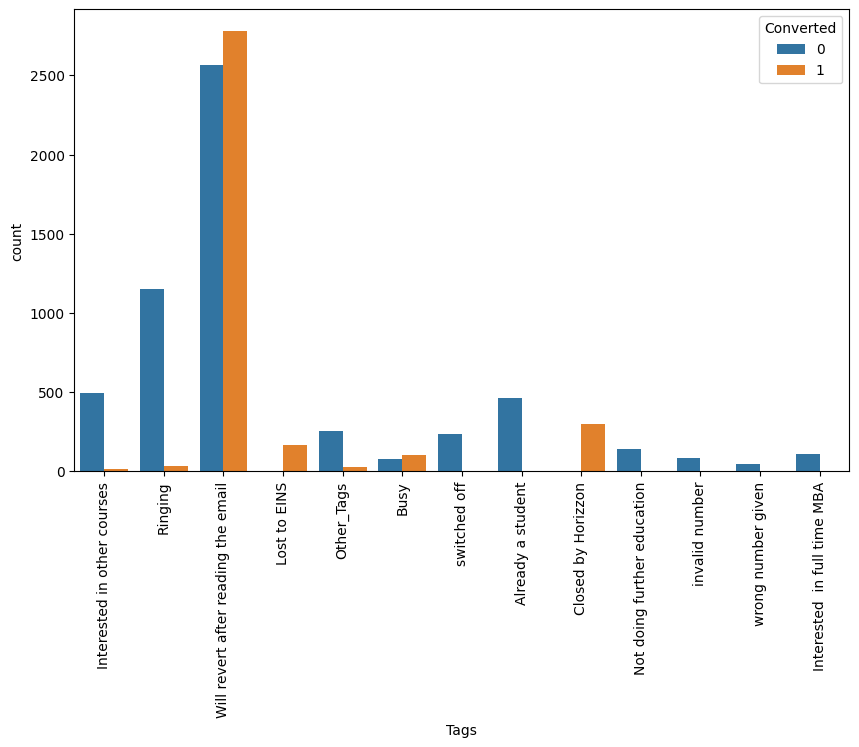

In [39]:
#Plotting the Tags graph again
plt.figure(figsize=(10,6))
sns.countplot(x=df["Tags"],hue=df["Converted"])
plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS:**

- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate


##### SUMMARY

Basis all the above countplots, we can observe the following details:

- *To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission', 'Lead Origins' and also increasing the number of leads from 'Lead Add Form'*


- *To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'*


- *Websites can be made more appealing so as to increase the time of the Users on websites*


- *We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent*


- *To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads*


- *We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis*

#### Now dropping the unnecessary columns

In [40]:
df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

In [41]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality        

## **Step 5: Creating the Dummy Variables**

In [43]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
# Now let's drop the original columns from the dataset by copying the dataset into a new variable

df_new = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'],axis=1)

df_new.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [45]:
df_new = pd.concat([df_new,dummy],axis=1)
df_new.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## **Step 6: Test-Train Split**

In [46]:
# Considering the feature variable to X
X = df_new.drop(["Prospect ID","Converted"],axis=1)

# Considering the response variable to y
y = df_new["Converted"]



In [47]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


In [48]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
#Now splitting the data into the Test and Train split.

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## **Step 7: Feature Scaling**

In [50]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
## Now checking the Conversion Rate

print("Conversion rate is ",(sum(df_new["Converted"])/len(df_new["Converted"].index))*100)

Conversion rate is  37.85541106458012


## **Step 8: Looking for the Correlations**

- Finding the correlation between the numerical variables

In [52]:
df_corr = df_new.corr()

- Unstacking the correlation matrix to find out top correlations

In [53]:
df_corr_unstacked = df_corr.unstack().sort_values(kind="quicksort")


In [54]:
df_corr_var = pd.DataFrame(df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(bool)).stack().sort_values(ascending=False))

In [55]:
df_corr_var.head(20)

,,0
Lead Origin_Lead Import,Lead Source_Facebook,0.983684
Last Activity_Unsubscribed,Last Notable Activity_Unsubscribed,0.872656
Lead Origin_Lead Add Form,Lead Source_Reference,0.866191
Last Activity_Email Opened,Last Notable Activity_Email Opened,0.861636
Last Activity_SMS Sent,Last Notable Activity_SMS Sent,0.853102
Last Activity_Email Link Clicked,Last Notable Activity_Email Link Clicked,0.800686
TotalVisits,Page Views Per Visit,0.737996
Last Activity_Page Visited on Website,Last Notable Activity_Page Visited on Website,0.691811
Do Not Email,Last Activity_Email Bounced,0.620041
Last Activity_Unreachable,Last Notable Activity_Unreachable,0.594369


- Now basis the above Dataframe, dropping the feature with high corelation.

In [56]:

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [57]:
df_corr = X_train.corr()

In [58]:
df_corr_var2 = pd.DataFrame(df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(bool)).stack().sort_values(ascending=False))

In [59]:
df_corr_var2.head(20)

,,0
Lead Origin_Lead Add Form,Lead Source_Reference,0.859537
TotalVisits,Page Views Per Visit,0.756104
Do Not Email,Last Activity_Email Bounced,0.624939
Last Activity_Other Activity,Last Notable Activity_Had a Phone Conversation,0.593057
Lead Source_Olark Chat,Specialization_Other_Specialization,0.505771
Page Views Per Visit,Lead Origin_Landing Page Submission,0.493007
Lead Origin_Lead Add Form,Lead Source_Welingak Website,0.468225
Last Activity_Email Bounced,Last Notable Activity_Email Bounced,0.450911
TotalVisits,Lead Origin_Landing Page Submission,0.447765
Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,0.419173


## **Step 9: Model Building**

- Logistic Regression Model

In [60]:
logr1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.8
Date:                Mon, 17 Apr 2023   Deviance:                       2551.6
Time:                        22:57:58   Pearson chi2:                 3.54e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0041      1.763      1.137      0.256      -1.451       5.460
Do Not Email                                            -1.3817      0.317     -4.362      0.000      -2.002      -0.761
TotalVisits                                              0.0695      0.085      0.815      0.415      -0.098       0.237
Total Time Spent on Website                              1.1466      0.063     18.110      0.000       1.022       1.271
Page Views Per Visit                                    -0.1212      0.085     -1.432      0.152      -0.287       0.045
Lead Origin_Landing Page Submission                     -1.0310      0.218     -4.722      0.000      -1.459      -0.603
Lead Origin_Lead Add Form                               -0.3581      1.310     -0.273      0.785      -2.926       2.210
Lead Origin_Lead Import                                  1.1699      0.820      1.427      0.154      -0.437       2.777
Lead Source_Google                                       0.1897      0.152      1.247      0.212      -0.108       0.488
Lead Source_Olark Chat                                   0.9961      0.227      4.385      0.000       0.551       1.441
Lead Source_Organic Search                               0.1893      0.206      0.917      0.359      -0.215       0.594
Lead Source_Other_Lead_Source                            0.9457      0.829      1.140      0.254      -0.680       2.571
Lead Source_Reference                                    1.8298      1.367      1.339      0.181      -0.849       4.508
Lead Source_Referral Sites                              -0.1186      0.490     -0.242      0.809      -1.079       0.842
Lead Source_Welingak Website                             5.5399      1.508      3.674      0.000       2.584       8.496
Last Activity_Email Bounced                             -0.5811      0.880     -0.661      0.509      -2.305       1.143
Last Activity_Email Link Clicked                        -0.8403      0.458     -1.833      0.067      -1.739       0.058
Last Activity_Email Opened                              -0.4341      0.348     -1.249      0.212      -1.115       0.247
Last Activity_Form Submitted on Website                  0.1271      0.591      0.215      0.830      -1.031       1.285
Last Activity_Olark Chat Conversation                   -0.5769      0.392     -1.470      0.142      -1.346       0.192
Last Activity_Other Activity                             1.4306      1.186      1.207      0.228      -0.893       3.754
Last Activity_Page Visited on Website                   -0.4234      0.402     -1.054      0.292      -1.211       0.364
Last Activity_SMS Sent                                   1

## **Step 10: Feature Selection using RFE**

- Let's start with 15 features selected by RFE
- And then, we will optimize the model further by inspecting VIF and p-value of the features.

In [61]:
logreg = LogisticRegression()
rfe_reg = RFE(logreg,n_features_to_select=15)
rfe_reg = rfe_reg.fit(X_train,y_train)

list(zip(X_train.columns,rfe_reg.support_,rfe_reg.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Other_Lead_Source', False, 33),
 ('Lead Source_Reference', False, 60),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 11),
 

In [62]:
colm = X_train.columns[rfe_reg.support_]

- Now let us assign the model with Statsmodel

In [63]:
X_train_sm = sm.add_constant(X_train[colm])
logr2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.1
Date:                Mon, 17 Apr 2023   Deviance:                       3106.2
Time:                        22:58:04   Pearson chi2:                 4.04e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5700
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0794      0.217     -4.963      0.000      -1.506      -0.653
Do Not Email                                     -1.1895      0.221     -5.376      0.000      -1.623      -0.756
Lead Origin_Lead Add Form                         0.8693      0.366      2.372      0.018       0.151       1.587
Lead Source_Welingak Website                      3.2594      0.820      3.976      0.000       1.653       4.866
Last Activity_SMS Sent                            1.9538      0.103     19.039      0.000       1.753       2.155
Tags_Busy                                         3.4717      0.323     10.757      0.000       2.839       4.104
Tags_Closed by Horizzon                           8.4090      0.775     10.849      0.000       6.890       9.928
Tags_Lost to EINS                                 9.4298      0.766     12.317      0.000       7.929      10.930
Tags_Ringing                                     -1.9594      0.331     -5.911      0.000      -2.609      -1.310
Tags_Will revert after reading the email          3.6656      0.231     15.900      0.000       3.214       4.117
Tags_invalid number                             -22.4206   1.34e+04     -0.002      0.999   -2.62e+04    2.62e+04
Tags_switched off                                -2.5297      0.584     -4.331      0.000      -3.674      -1.385
Lead Quality_Not Sure                            -3.4872      0.130    -26.738      0.000      -3.743      -3.232
Lead Quality_Worst                               -3.9571      0.834     -4.745      0.000      -5.592      -2.323
Last Notable Activity_Modified                   -1.6959      0.107    -15.830      0.000      -1.906      -1.486
Last Notable Activity_Olark Chat Conversation    -1.3029      0.352     -3.699      0.000      -1.993      -0.612
=================================================================================================================
"""

- Now let us put the prdicted values on the traain set.

In [64]:
y_train_pred = res.predict(X_train_sm)

In [65]:
y_train_pred[:10]

3009    0.288839
1012    0.110023
9226    0.001892
4750    0.741307
7987    0.994066
1281    0.989439
2880    0.288839
4971    0.702437
7536    0.929965
1248    0.001892
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28883901, 0.11002273, 0.00189224, 0.7413066 , 0.99406588,
       0.98943879, 0.28883901, 0.70243735, 0.92996485, 0.00189224])

#### Forming a dataframe the predicted values and the true conversion status.

In [67]:
y_train_pred_final = pd.DataFrame({"Convert":y_train.values,"Convert_probability":y_train_pred})
y_train_pred_final["Pros_ID"] = y_train.index
y_train_pred_final.head()

,Convert,Convert_probability,Pros_ID
0,0,0.288839,3009
1,0,0.110023,1012
2,0,0.001892,9226
3,1,0.741307,4750
4,1,0.994066,7987


- Forming a new column "Predicted" in the above Dataframe with 1 if Convert_probability >0.5 else 0.

In [68]:
y_train_pred_final["predicted"] = y_train_pred_final["Convert_probability"].map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_probability,Pros_ID,predicted
0,0,0.288839,3009,0
1,0,0.110023,1012,0
2,0,0.001892,9226,0
3,1,0.741307,4750,1
4,1,0.994066,7987,1


In [69]:
# Printing the accuracy score below:

print("Accuracy score", metrics.accuracy_score(y_train_pred_final["Convert"],y_train_pred_final["predicted"]))

Accuracy score 0.9209573295544009


#### Calculating VIFs

In [70]:
def calculate_VIF(X_train):
    vif_df = pd.DataFrame()
    vif_df["Features"] = X_train.columns
    vif_df["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif_df["VIF"] = round(vif_df["VIF"],2)
    vif_df = vif_df.sort_values(by= "VIF", ascending=False)
    print(vif_df)

calculate_VIF(X_train[colm])

                                         Features   VIF
11                          Lead Quality_Not Sure  3.02
8        Tags_Will revert after reading the email  2.70
13                 Last Notable Activity_Modified  1.69
3                          Last Activity_SMS Sent  1.63
1                       Lead Origin_Lead Add Form  1.58
7                                    Tags_Ringing  1.53
2                    Lead Source_Welingak Website  1.35
5                         Tags_Closed by Horizzon  1.17
0                                    Do Not Email  1.13
12                             Lead Quality_Worst  1.13
4                                       Tags_Busy  1.11
10                              Tags_switched off  1.10
6                               Tags_Lost to EINS  1.06
14  Last Notable Activity_Olark Chat Conversation  1.05
9                             Tags_invalid number  1.04


- Though all tha above mentioned variables have a good value of VIF. However, from the previous model we can observe that the column "Tags_invalid number" has high p-value, and therefore we will drop this column and remake the model.

In [71]:
colm = colm.drop("Tags_invalid number")
colm

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

- Now let us re-evaluate the model using the selected variable.

In [72]:
X_train_sm = sm.add_constant(X_train[colm])
logr3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.1
Date:                Mon, 17 Apr 2023   Deviance:                       3118.3
Time:                        22:58:05   Pearson chi2:                 3.94e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2486      0.218     -5.725      0.000      -1.676      -0.821
Do Not Email                                     -1.1805      0.221     -5.350      0.000      -1.613      -0.748
Lead Origin_Lead Add Form                         0.9081      0.369      2.464      0.014       0.186       1.630
Lead Source_Welingak Website                      3.2182      0.820      3.923      0.000       1.611       4.826
Last Activity_SMS Sent                            1.9270      0.102     18.901      0.000       1.727       2.127
Tags_Busy                                         3.6495      0.322     11.338      0.000       3.019       4.280
Tags_Closed by Horizzon                           8.5559      0.776     11.031      0.000       7.036      10.076
Tags_Lost to EINS                                 9.5786      0.766     12.504      0.000       8.077      11.080
Tags_Ringing                                     -1.7714      0.330     -5.368      0.000      -2.418      -1.125
Tags_Will revert after reading the email          3.8317      0.231     16.579      0.000       3.379       4.285
Tags_switched off                                -2.3367      0.583     -4.008      0.000      -3.479      -1.194
Lead Quality_Not Sure                            -3.4792      0.130    -26.743      0.000      -3.734      -3.224
Lead Quality_Worst                               -3.9437      0.836     -4.720      0.000      -5.581      -2.306
Last Notable Activity_Modified                   -1.6821      0.107    -15.737      0.000      -1.892      -1.473
Last Notable Activity_Olark Chat Conversation    -1.3049      0.352     -3.706      0.000      -1.995      -0.615
=================================================================================================================
"""

In [73]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final["Convert_probability"] = y_train_pred

- Again creating a new column in the Dataframe with 1 if "Convert_probability">0.5 else 0

In [74]:
y_train_pred_final["predicted"] = y_train_pred_final["Convert_probability"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_probability,Pros_ID,predicted
0,0,0.289842,3009,0
1,0,0.111387,1012,0
2,0,0.001918,9226,0
3,1,0.737087,4750,1
4,1,0.993914,7987,1


In [75]:
# Now let's check the overall accuracy again.

print("Accuracy score", metrics.accuracy_score(y_train_pred_final["Convert"],y_train_pred_final["predicted"]))

Accuracy score 0.920642418516769


- The accuracy is still practically the same.

#### Now checking the VIF again.

In [76]:
calculate_VIF(X_train[colm])

                                         Features   VIF
10                          Lead Quality_Not Sure  2.97
8        Tags_Will revert after reading the email  2.66
12                 Last Notable Activity_Modified  1.68
3                          Last Activity_SMS Sent  1.62
1                       Lead Origin_Lead Add Form  1.58
7                                    Tags_Ringing  1.51
2                    Lead Source_Welingak Website  1.35
5                         Tags_Closed by Horizzon  1.17
0                                    Do Not Email  1.12
11                             Lead Quality_Worst  1.12
4                                       Tags_Busy  1.11
9                               Tags_switched off  1.09
6                               Tags_Lost to EINS  1.06
13  Last Notable Activity_Olark Chat Conversation  1.05


- Basis the above VIF calculations, we can se that all variables have a good value of VIF and p-values. So we need not to drop any more variables and we can proceed with making predictions using this model only.

### Now Moving ahead with the model evaluation:

- **Function Name:** evaluate_model
- **Arguments:**
    - "y_true"
    - "y_predicted"
- **Printing values:**
    - Confusion Matrix
    - Accuracy
    - Sensitivity
    - Specificity
    - False Positive Rate
    - Positive Predicitive Value
- **Returns:**
    - Accuracy
    - Sensitivity
    - Specificity

                Predicted ---->     not_converted       |         converted
        Actual
-       not_converted --->      TN (True Negative)    |     FP(False Positive)
-       converted    ---->      FN (False Negative)   |     TP(True Positive)

In [77]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true,y_predicted)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    accuracy_scr = metrics.accuracy_score(y_true,y_predicted)
    sensitivity_scr = TP/float(TP+FN)
    specificity_scr = TN/float(TN+FP)
    precision_scr = precision_score(y_true,y_predicted)

    if print_score:
        print("Confusion Matrix:\n ", confusion)
        print("Accuracy: ",accuracy_scr)
        print("Sensitivity: ",sensitivity_scr)
        print("Specificity: ",specificity_scr)
        print("Precision: ",precision_scr)
    return accuracy_scr, sensitivity_scr, specificity_scr, precision_scr



In [78]:
# Now let's evaluate the model:

evaluate_model(y_train_pred_final["Convert"],y_train_pred_final["predicted"],print_score=True)

Confusion Matrix:
  [[3761  144]
 [ 360 2086]]
Accuracy:  0.920642418516769
Sensitivity:  0.8528209321340965
Specificity:  0.963124199743918
Precision:  0.9354260089686098


(0.920642418516769, 0.8528209321340965, 0.963124199743918, 0.9354260089686098)

## **Step 11: Plotting the ROC Curve**

ROC curve
- It shows tradeoff between sensitivity and specificity (increment in one will cause decrease in another).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, our goal is to achieve a good sensitivity score.

In [79]:
def draw_roc(actual,probability):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probability)
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    return None



In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Convert"], y_train_pred_final["Convert_probability"],drop_intermediate=False)

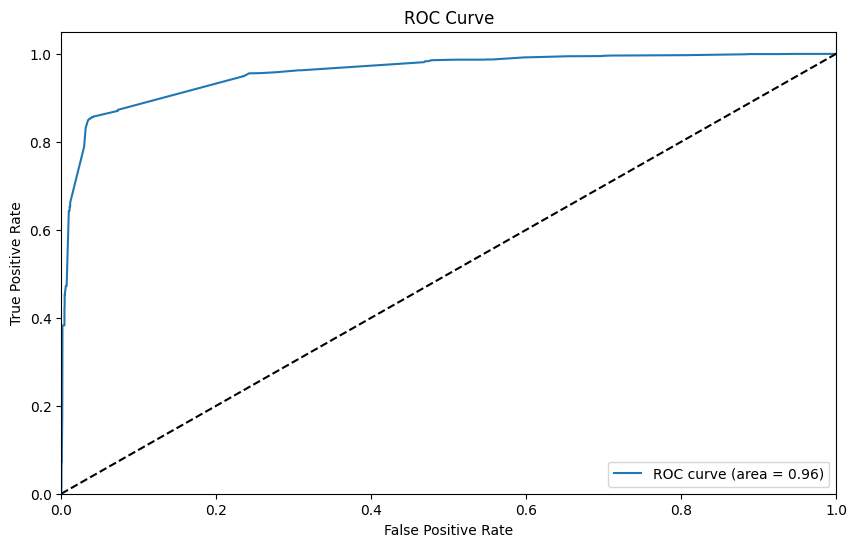

In [81]:
draw_roc(y_train_pred_final["Convert"],y_train_pred_final["Convert_probability"])

## **Step 12: Finding the optimal value for cut off**

- Now Predicting the convert status with different probability cutoffs.

In [82]:
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i] = y_train_pred_final["Convert_probability"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_probability,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289842,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.111387,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.001918,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.737087,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993914,7987,1,1,1,1,1,1,1,1,1,1,1


- Calculating accuracy, sensitivity and specificity for all different probability cutoffs from 0.1 to 0.9


In [83]:
df_prob = pd.DataFrame(columns=["Probability_Score","Accuracy_Score","Sensitivity_Score","Specificity_Score","Precision_Score"])

for i in [float(x)/10 for x in range(10)]:
    (Accuracy_Score, Sensitivity_Score, Specificity_Score, Precision_Score) = evaluate_model(y_train_pred_final["Convert"],y_train_pred_final[i])
    df_prob.loc[i] = [i,Accuracy_Score, Sensitivity_Score, Specificity_Score, Precision_Score]

In [84]:
df_prob

,Probability_Score,Accuracy_Score,Sensitivity_Score,Specificity_Score,Precision_Score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.807117,0.959526,0.711652,0.675785
0.2,0.2,0.820343,0.956664,0.734955,0.693333
0.3,0.3,0.905999,0.872445,0.927017,0.882183
0.4,0.4,0.919540,0.856092,0.959283,0.929427
0.5,0.5,0.920642,0.852821,0.963124,0.935426
0.6,0.6,0.920328,0.851594,0.963380,0.935759
0.7,0.7,0.920328,0.848324,0.965429,0.938914
0.8,0.8,0.861912,0.659853,0.988476,0.972875
0.9,0.9,0.856086,0.643500,0.989245,0.974010


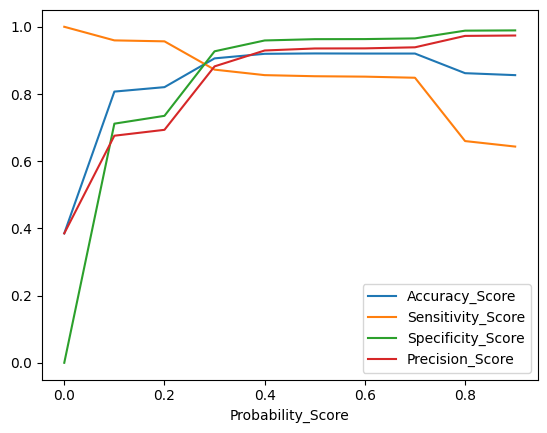

In [85]:
df_prob.plot.line(x="Probability_Score",y=["Accuracy_Score", "Sensitivity_Score", "Specificity_Score", "Precision_Score"])
plt.show()

### Precision-Recall Curve

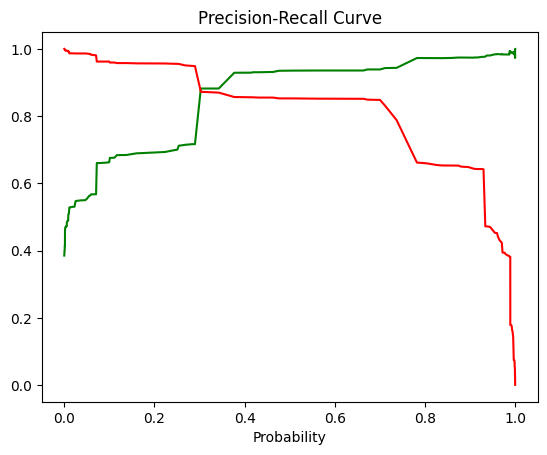

In [86]:
p, r, thresh = precision_recall_curve(y_train_pred_final["Convert"], y_train_pred_final["Convert_probability"])

plt.plot(thresh, p[:-1],"g-")
plt.plot(thresh, r[:-1],"r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Curve")
plt.show()


### **Basis the above the two curves we can draw the following conclusion:**

- ### In the Specificity-Accuracy Plot we find that the probability of 0.27 looks optimal.

- ### In the Precision-Recall Curve, the probability of 0.3 looks optimal.

Thus basis the above observations we can take the probability of 0.27 as optimum point and assigning the lead score into the training data.

In [87]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]


In [89]:
y_train_pred_final["Convert_predicted"] = y_train_pred_final["Convert_probability"].map(lambda x: 1 if x > 0.27 else 0)

In [91]:
y_train_pred_final["Lead_Score"] = y_train_pred_final["Convert_probability"].map(lambda x: round(x*100))

y_train_pred_final.head()

,Convert,Convert_probability,Pros_ID,Convert_predicted,Lead_Score
0,0,0.289842,3009,1,29
1,0,0.111387,1012,0,11
2,0,0.001918,9226,0,0
3,1,0.737087,4750,1,74
4,1,0.993914,7987,1,99


### Evaluating model's performance on training data

In [92]:
evaluate_model(y_train_pred_final["Convert"],y_train_pred_final["Convert_predicted"],print_score=True)

Confusion Matrix:
  [[2987  918]
 [ 124 2322]]
Accuracy:  0.8359313493937962
Sensitivity:  0.9493049877350777
Specificity:  0.7649167733674775
Precision:  0.7166666666666667


(0.8359313493937962,
 0.9493049877350777,
 0.7649167733674775,
 0.7166666666666667)

### Getting the Predicted vlaues on th training dataset.

In [94]:
X_test_sm = sm.add_constant(X_test[colm])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df["Prospect ID"] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True),y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final["Final_Predicted"] = y_predicted_final["Converting_Probability"].map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final["Lead_Score"] = y_predicted_final["Converting_Probability"].map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,Final_Predicted,Lead_Score
0,0,3271,0.289842,1,29
1,1,1490,0.929765,1,93
2,0,7936,0.289842,1,29
3,1,4216,0.998548,1,100
4,0,3830,0.289842,1,29


### Evaluating model's performance on test data

In [95]:
evaluate_model(y_predicted_final["Converted"], y_predicted_final["Final_Predicted"], print_score=True)

Confusion Matrix:
  [[1303  431]
 [  71  918]]
Accuracy:  0.8156445097319134
Sensitivity:  0.9282103134479271
Specificity:  0.751441753171857
Precision:  0.6805040770941438


(0.8156445097319134, 0.9282103134479271, 0.751441753171857, 0.6805040770941438)

## **Step 12: Final Model**

### Building a logistic regression model and returning the predicted values on training dataset, while the training & test data, and probability cutoff is given.


In [100]:
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):

    # Training Model
    X_test_sm = sm.add_constant(X_train)
    logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logreg.fit()

    y_test_pred = res.predict(X_train_sm).values.reshape(-1)

    y_train_pred_final = pd.DataFrame({"Prospect_ID":y_train.index, "Converted":y_train.values, "Convert_Probability":y_train_pred})
    y_train_pred_final["Convert_predicted"] = y_train_pred_final["Convert_Probability"].map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final["Lead_Score"] = y_train_pred_final["Convert_Probability"].map(lambda x: round(x*100))
    print("____________________Result of the Training Data____________________")
    print(y_train_pred_final.head())

    # Predicting the Lead Score on Test Data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({"Prospect_ID":y_test.index, "Converted":y_test.values, "Convert_Probability":y_test_pred})
    y_test_pred_final["Convert_predicted"] = y_test_pred_final["Convert_Probability"].map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final["Lead_Score"] = y_test_pred_final["Convert_Probability"].map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("____________________Result of the Test Data____________________")
    print(y_test_pred_final.head())

    print("____________________Model Evaluation Metrics____________________")
    evaluate_model(y_test_pred_final["Converted"],y_test_pred_final["Convert_predicted"],print_score=True)

    return y_test_pred_final



In [101]:
build_model_cutoff(X_train[colm], y_train, X_test[colm], y_test, cutoff=0.27)

____________________Result of the Training Data____________________
   Prospect_ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.289842                  1          29
1         1012          0             0.111387                  0          11
2         9226          0             0.001918                  0           0
3         4750          1             0.737087                  1          74
4         7987          1             0.993914                  1          99
____________________Result of the Test Data____________________
   Prospect_ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.289842                  1          29
1         1490          1             0.929765                  1          93
2         7936          0             0.289842                  1          29
3         4216          1             0.998548                  1         100
4         

,Prospect_ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.289842,1,29
1,1490,1,0.929765,1,93
2,7936,0,0.289842,1,29
3,4216,1,0.998548,1,100
4,3830,0,0.289842,1,29
...,...,...,...,...,...
2718,850,0,0.070553,0,7
2719,2879,0,0.001642,0,0
2720,6501,1,0.989122,1,99
2721,7155,0,0.070553,0,7


In [103]:
print("Features used in Final Model :", colm)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                           -1.248649
Do Not Email                                    -1.180501
Lead Origin_Lead Add Form                        0.908052
Lead Source_Welingak Website                     3.218160
Last Activity_SMS Sent                           1.927033
Tags_Busy                                        3.649486
Tags_Closed by Horizzon                          8.555901
Tags_Lost to EINS                                9.578

## **Conclusion:**

- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.


- Here, the logistic regression model is used to predict the probabilty of conversion of a customer. 


- Optimum cut off is chosen to be 0.27 i.e. 
any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and
any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)


- Our final Logistic Regression Model is built with 14 features.


- Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']
       
- The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors. 

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’.
‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.
       

- Tags_Lost to EINS            (Coefficient factor = 9.578632)
- Tags_Closed by Horizzon      (Coefficient factor = 8.555901)
- Lead Quality_Worst           (Coefficient factor =-3.943680)


- The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.


- The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.


- We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)